In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import dabest
import numpy as np

In [19]:
tex_fonts = {
#     # Use LaTeX to write all text
#     "text.usetex": True,
    "font.family": "serif",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 10,
    "font.size": 10,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 8,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8
}
plt.style.use('seaborn-paper')
plt.rcParams.update(tex_fonts)

%config InlineBackend.figure_format = 'retina'

In [20]:
def set_size(width, fraction=1, subplots=(1, 1)):
    """Set figure dimensions to avoid scaling in LaTeX.
    Parameters
    ----------
    width: float or string
            Document width in points, or string of predined document type
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy
    subplots: array-like, optional
            The number of rows and columns of subplots.
    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    if width == 'thesis':
        width_pt = 426.79135
    elif width == 'beamer':
        width_pt = 307.28987
    else:
        width_pt = width

    # Width of figure (in pts)
    fig_width_pt = width_pt * fraction
    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    # https://disq.us/p/2940ij3
    golden_ratio = (5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio * (subplots[0] / subplots[1])

    return (fig_width_in, fig_height_in)

In [21]:
fig_save_path = 'D:/ryanh/github/TgF344-AD_Open_Field/notebooks/figs/'
data_path = 'D:/ryanh/github/TgF344-AD_Open_Field/notebooks/data/'
df = pd.read_csv(data_path+'movement_epochs.csv')
df = df[df.day=='D1']
df
# df

,subID,group,day,circuity,num_runs,proximity_cue,median_peak_vel,median_duration,median_inter_run_interval
0,Tg102_D1,tg,D1,0.719166,8,111.368398,7.231567,13.383333,28.600000
2,Tg103_D1,tg,D1,0.674341,12,19.620289,2.814024,10.500000,79.033333
4,Tg104_D1,tg,D1,0.705320,5,150.121447,3.500167,14.600000,312.883333
6,Tg105_D1,tg,D1,0.608348,10,88.015751,3.485482,16.383333,107.233333
8,Tg106_D1,tg,D1,0.670795,20,151.330478,2.993030,7.883333,18.400000
10,Tg108_D1,tg,D1,0.674341,14,126.209300,3.715448,6.733333,43.133333
12,Tg109_D1,tg,D1,0.608348,21,19.620289,3.475323,8.133333,26.350000
14,Tg110_D1,tg,D1,0.639838,16,135.044515,4.493242,16.100000,24.700000
16,Tg111_D1,tg,D1,0.600051,11,16.312278,4.250462,11.066667,92.016667
18,Tg112_D1,tg,D1,0.677822,17,93.031679,4.892375,9.500000,15.200000


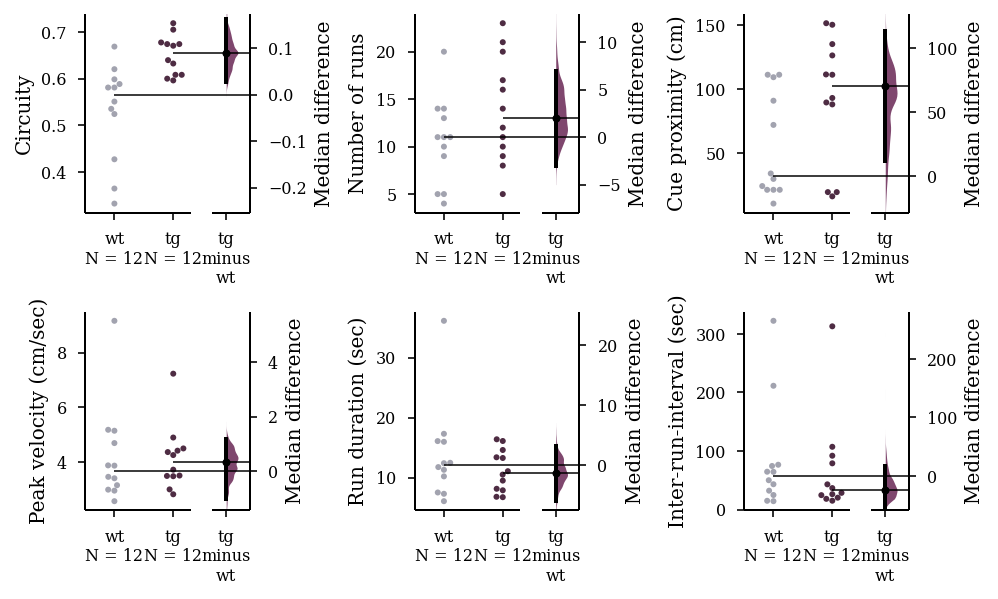

In [22]:
fig, axs = plt.subplots(2,3, figsize=set_size('thesis', fraction=1.25, subplots=(3, 3)), edgecolor='k')
fig.subplots_adjust(hspace = 0.5, wspace=1)
axs = axs.ravel()

flatui = ["#601a4a","#9c9eb5"]   #color schedule for Tg and Wt, respectively.

dabest_obj = dabest.load(df, idx=("wt","tg"),x="group", y="circuity")
dabest_obj.median_diff.plot(ax=axs[0],custom_palette=flatui,raw_marker_size=3,es_marker_size=4)
axs[0].set_ylabel("Circuity")

dabest_obj = dabest.load(df, idx=("wt","tg"),x="group", y="num_runs")
dabest_obj.median_diff.plot(ax=axs[1],custom_palette=flatui,raw_marker_size=3,es_marker_size=4)
axs[1].set_ylabel("Number of runs")

dabest_obj = dabest.load(df, idx=("wt","tg"),x="group", y="proximity_cue")
dabest_obj.median_diff.plot(ax=axs[2],custom_palette=flatui,raw_marker_size=3,es_marker_size=4)
axs[2].set_ylabel("Cue proximity (cm)")

dabest_obj = dabest.load(df, idx=("wt","tg"),x="group", y="median_peak_vel")
dabest_obj.median_diff.plot(ax=axs[3],custom_palette=flatui,raw_marker_size=3,es_marker_size=4)
axs[3].set_ylabel("Peak velocity (cm/sec)")

dabest_obj = dabest.load(df, idx=("wt","tg"),x="group", y="median_duration")
dabest_obj.median_diff.plot(ax=axs[4],custom_palette=flatui,raw_marker_size=3,es_marker_size=4)
axs[4].set_ylabel("Run duration (sec)")

dabest_obj = dabest.load(df, idx=("wt","tg"),x="group", y="median_inter_run_interval")
dabest_obj.median_diff.plot(ax=axs[5],custom_palette=flatui,raw_marker_size=3,es_marker_size=4)
axs[5].set_ylabel("Inter-run-interval (sec)")


plt.savefig(fig_save_path+'movement_epochs_d1.svg',dpi=300,bbox_inches='tight')
plt.savefig(fig_save_path+'movement_epochs_d1.png',dpi=300,bbox_inches='tight')


In [23]:
fig_save_path = 'D:/ryanh/github/TgF344-AD_Open_Field/notebooks/figs/'
data_path = 'D:/ryanh/github/TgF344-AD_Open_Field/notebooks/data/'
df = pd.read_csv(data_path+'movement_epochs.csv')
df = df[df.day=='D2']
df

,subID,group,day,circuity,num_runs,proximity_cue,median_peak_vel,median_duration,median_inter_run_interval
1,Tg102_D2,tg,D2,0.719166,5,150.953187,3.278970,15.466667,232.283333
3,Tg103_D2,tg,D2,0.698429,10,149.441145,3.022853,16.866667,31.666667
5,Tg104_D2,tg,D2,0.662044,15,164.203046,3.358043,14.833333,55.383333
7,Tg105_D2,tg,D2,0.787327,16,120.758554,5.605506,10.050000,22.066667
9,Tg106_D2,tg,D2,0.666206,5,155.103428,5.567153,27.366667,74.466667
11,Tg108_D2,tg,D2,0.695317,11,158.350374,5.417072,6.200000,24.300000
13,Tg109_D2,tg,D2,0.530274,10,16.312278,4.820221,13.383333,22.500000
15,Tg110_D2,tg,D2,0.679007,17,135.044515,3.562460,8.533333,44.083333
17,Tg111_D2,tg,D2,0.620467,33,90.418037,3.352243,8.700000,27.816667
19,Tg112_D2,tg,D2,0.826040,25,92.210949,3.926392,6.133333,19.800000


D:\ryanh\Anaconda3\envs\TgF344-AD_Open_Field\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 25.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


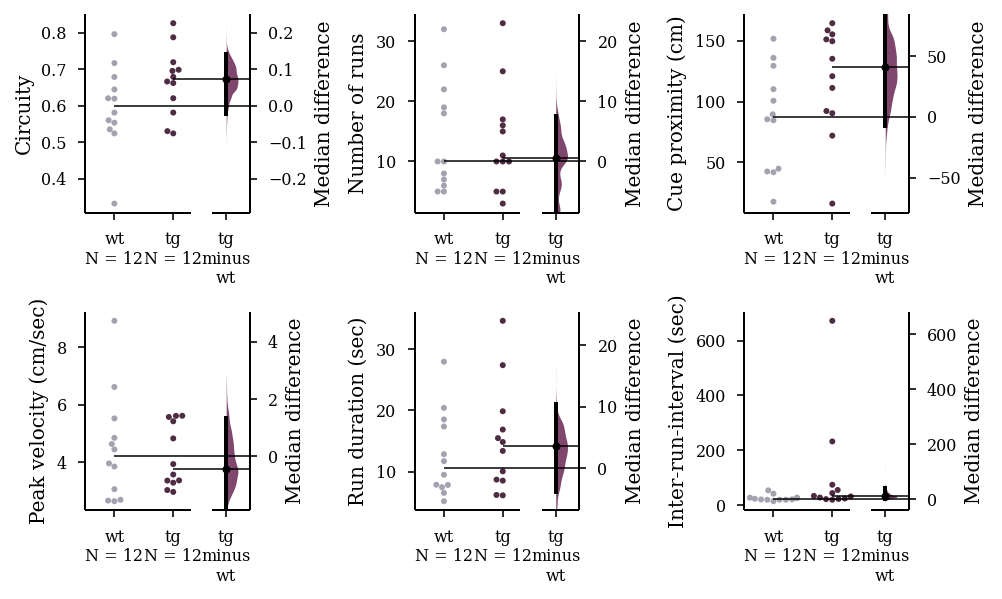

In [24]:
fig, axs = plt.subplots(2,3, figsize=set_size('thesis', fraction=1.25, subplots=(3, 3)), edgecolor='k')
fig.subplots_adjust(hspace = 0.5, wspace=1)
axs = axs.ravel()

flatui = ["#601a4a","#9c9eb5"]   #color schedule for Tg and Wt, respectively.

dabest_obj = dabest.load(df, idx=("wt","tg"),x="group", y="circuity")
dabest_obj.median_diff.plot(ax=axs[0],custom_palette=flatui,raw_marker_size=3,es_marker_size=4)
axs[0].set_ylabel("Circuity")

dabest_obj = dabest.load(df, idx=("wt","tg"),x="group", y="num_runs")
dabest_obj.median_diff.plot(ax=axs[1],custom_palette=flatui,raw_marker_size=3,es_marker_size=4)
axs[1].set_ylabel("Number of runs")

dabest_obj = dabest.load(df, idx=("wt","tg"),x="group", y="proximity_cue")
dabest_obj.median_diff.plot(ax=axs[2],custom_palette=flatui,raw_marker_size=3,es_marker_size=4)
axs[2].set_ylabel("Cue proximity (cm)")

dabest_obj = dabest.load(df, idx=("wt","tg"),x="group", y="median_peak_vel")
dabest_obj.median_diff.plot(ax=axs[3],custom_palette=flatui,raw_marker_size=3,es_marker_size=4)
axs[3].set_ylabel("Peak velocity (cm/sec)")

dabest_obj = dabest.load(df, idx=("wt","tg"),x="group", y="median_duration")
dabest_obj.median_diff.plot(ax=axs[4],custom_palette=flatui,raw_marker_size=3,es_marker_size=4)
axs[4].set_ylabel("Run duration (sec)")

dabest_obj = dabest.load(df, idx=("wt","tg"),x="group", y="median_inter_run_interval")
dabest_obj.median_diff.plot(ax=axs[5],custom_palette=flatui,raw_marker_size=3,es_marker_size=4)
axs[5].set_ylabel("Inter-run-interval (sec)")


plt.savefig(fig_save_path+'movement_epochs_d2.svg',dpi=300,bbox_inches='tight')
plt.savefig(fig_save_path+'movement_epochs_d2.png',dpi=300,bbox_inches='tight')
